In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import arviz as az
import bambi as bmb
import hddm_wfpt
import jax
import pytensor

import hssm

In [5]:
RNG = np.random.default_rng(seed=2025)
np.set_printoptions(suppress=True)

In [6]:
pytensor.config.floatX = "float32"
jax.config.update("jax_enable_x64", False)

In [7]:
true_params = {
    "v": 0.5,
    "a": 1.5,
    "z": 0.5,
    "t": 0.5
}

In [8]:
dataset = hssm.simulate_data(model="ddm", theta=true_params, size=1000)

In [9]:
dataset

,rt,response
0,3.046387,-1.0
1,1.681259,1.0
2,0.957492,1.0
3,5.573529,1.0
4,3.558352,1.0
...,...,...
995,7.416538,1.0
996,1.064397,1.0
997,1.075810,1.0
998,10.958697,1.0


<Axes: xlabel='rt', ylabel='Count'>

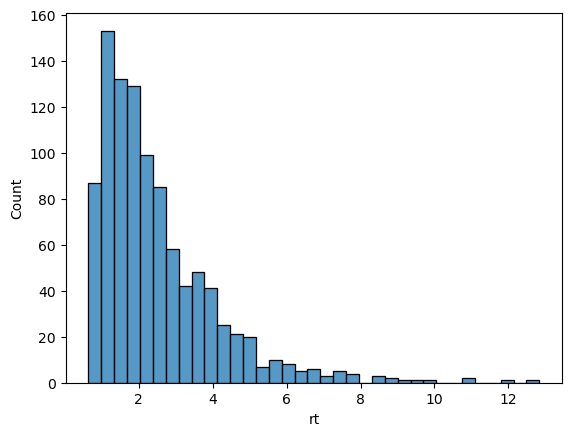

In [10]:
sns.histplot(dataset.rt)

In [11]:
simple_ddm = hssm.HSSM(data=dataset)

Model initialized successfully.


In [12]:
simple_ddm

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 1000

Parameters:

v:
    Prior: Normal(mu: 0.0, sigma: 2.0)
    Explicit bounds: (-inf, inf)

a:
    Prior: HalfNormal(sigma: 2.0)
    Explicit bounds: (0.0, inf)

z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)

t:
    Prior: HalfNormal(sigma: 2.0)
    Explicit bounds: (0.0, inf)


Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 20.0)

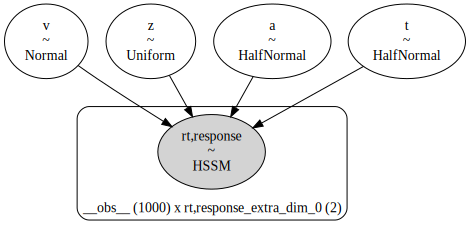

In [13]:
simple_ddm.graph()